In [1]:
import json

business_data = open('/Users/charumehndiratta/Downloads/dataset/business.json')
restaurants = []

for line in business_data:
    business = json.loads(line)
    if 'Restaurants' in business['categories'] and 'Chipotle' in business['name']:
        restaurants.append({'business_id': business['business_id'], 'state': business['state'], 'name': business['name']})


In [2]:
review_dict = {}

review_data = open('/Users/charumehndiratta/Downloads/dataset/review.json')

for line in review_data:
    review = json.loads(line)
    if review.get('business_id') in review_dict:
        for data in review_dict[review['business_id']]:
            if review['date'][:4]+"_stars" in data:
                data[review['date'][:4]+"_stars"] = data[review['date'][:4]+"_stars"] + review['stars']
                data[review['date'][:4]+"_count"] = data[review['date'][:4]+"_count"] + 1
            else:
                data[review['date'][:4]+"_stars"] = review['stars']
                data[review['date'][:4]+"_count"] = 1
    else:
        review_dict[review['business_id']] = [{review['date'][:4]+"_stars" : review['stars'], review['date'][:4]+"_count" : 1}]

reviews1 = []

In [3]:
import copy
new_review_dict = copy.deepcopy(review_dict)

for key, val in new_review_dict.items():
    for key_val, val_val in val[0].items():
        new_key = key_val[:4]
        star_key = key_val[:4]+"_stars"
        count_key = key_val[:4]+"_count"
        if star_key in val[0] and count_key in val[0]:
            new_key_val = float(val[0][star_key])/val[0][count_key]
            new_review_dict[key][0].update({new_key: new_key_val})
        if key_val in new_review_dict[key][0]:
            new_review_dict[key][0].pop(key_val)

In [4]:
reviews3 = {}
import copy

new_review_dict1 = copy.deepcopy(new_review_dict)
for key, val in new_review_dict1.items():
    for value in val:
        new_review_dict1[key] = value

print (new_review_dict['-FNquqGseSCVMWo7KbK-Tg'])

[{u'2015': 3.1904761904761907, u'2014': 3.875, u'2017': 2.8181818181818183, u'2016': 3.6, u'2011': 3.5555555555555554, u'2010': 3.6666666666666665, u'2013': 3.4, u'2012': 3.888888888888889, u'2007': 4.0, u'2005': 5.0, u'2008': 4.0, u'2009': 3.0}]


In [5]:
for restaurant in restaurants:
    if restaurant['business_id'] in new_review_dict1:
        reviews3[restaurant['business_id']] = new_review_dict1[restaurant['business_id']]


In [6]:
import matplotlib.pyplot as plt

reviews = {'2005': [0,0], '2006': [0,0], '2007': [0,0], '2008': [0,0], '2009': [0,0], '2010': [0,0], '2011': [0,0], '2012': [0,0], '2013': [0,0], '2014': [0,0], '2015': [0,0], '2016': [0,0], '2017':[0,0]}

# count, stars
plt.xlabel("Year")
plt.ylabel("Scores")
plt.grid()


for key, val in reviews3.items():
    x = val.keys()
    y = val.values()
        
    for i in range(len(x)):
        reviews[x[i]][0] = reviews[x[i]][0] + 1
        reviews[x[i]][1] = reviews[x[i]][1] + int(y[i])


new_reviews = {}
for key, val in reviews.items():
    new_reviews[key] = float(val[1])/float(val[0])


{'2009': 3.7142857142857144, '2010': 3.676056338028169, '2006': 3.6666666666666665, '2007': 4.0, '2005': 3.3333333333333335, '2015': 2.4838709677419355, '2014': 2.6194029850746268, '2017': 2.2906976744186047, '2016': 2.402439024390244, '2011': 3.5, '2008': 3.4482758620689653, '2013': 2.9210526315789473, '2012': 3.2475247524752477}


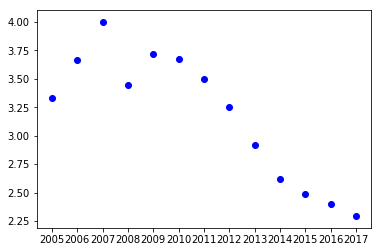

In [7]:
print(new_reviews)
y_label = new_reviews.values()
x_label = new_reviews.keys()
    
plt.scatter(
    x_label,
    y_label,
    color='b',
    label=key)
plt.show()